# מעבדה 2 - ניתוח השפעת פיזור נקודות בקרה על פתרון תצלום


In [1]:
import numpy as np
from numpy.linalg import solve, inv
from matplotlib import pyplot as plt

## שלב 1 - בניית המודל והנתונים 

- *התקינו מחדש את המודול MatrixMethods*
- *במהלך המעבדה נשתמש בקודים ממעבדה קודמת*
- *ניתן לכתוב את הפונקציות ב-Pycharm ולייבא אותן ל-Jupyter במקרה הצורך*

In [2]:
from Camera import Camera
import PhotoViewer as pv
from SingleImage import SingleImage
import MatrixMethods

### חלק א'

מהו המודל שאנחנו רוצים לבדוק?

אוריינטציה חיצונית- הכלל הקוליניארי



נבנה את הנתונים

- מספר נקודות שיתן לבדוק את המודל
     - לפחות שלוש נקודות

- המבנה הפשוט ביותר
    - גם למימוש

- במיקום הנוח ביותר

- הפיזור ש"מרגיש" לנו הכי חסון (יציב גיאומטרית)


In [3]:
from ObjectsSynthetic import *
edgeSize = 10
squere = np.array([[-edgeSize/2,edgeSize/2,0],[edgeSize/2,edgeSize/2,0],[edgeSize/2,-edgeSize/2,0],[-edgeSize/2,-edgeSize/2,0]])

נבחר את פרמטרי המודל

 - נבחר בפרמטרים הנוחים ביותר 
    - מספרים ו/או זוויות שלמים ו"יפים" 

- נתחיל מהמודל הכי פשוט שאפשר
    - תצלום אנכי מעל הראשית
    

In [4]:
# define camera
focal_length = 35
sensor_size = 25
camera1 = Camera(focal_length, np.array([0, 0]), None, None, None, sensor_size)

# define image
omega = 0
phi = 0
kappa = 0
Z = 20
img1 = SingleImage(camera1)
img1.innerOrientationParameters = np.array([0,1,0,0,0,1])
img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])

ציירו את המודל והנתונים במערכת העולם 

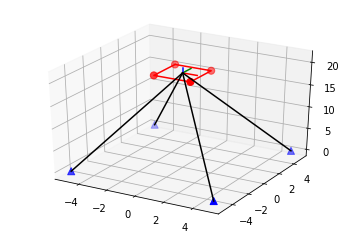

In [5]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
scale = 100
img1.drawSingleImage(squere, scale, ax,'yes')
# pv.drawOrientation(img1.RotationMatrix,img1.PerspectiveCenter,1,ax)
# pv.drawImageFrame(sensor_size/1000,sensor_size/1000,img1.RotationMatrix,img1.PerspectiveCenter,camera1.focalLength/1000,10,ax)
ax.scatter(squere[:,0],squere[:,1],squere[:,2], c='b', s=50,marker='^')
plt.show()

נייצר את הנתונים לאחר ההתמרה

In [6]:
imagePoints1 = img1.GroundToImage(squere)
print(imagePoints1)

[[-8.75  8.75]
 [ 8.75  8.75]
 [ 8.75 -8.75]
 [-8.75 -8.75]]


נבנה את המודל אותו נרצה לבדוק

אוריינטציה חיצונית באמצעות הכלל הקו-לינארי.
הפונקציה נבנתה סמסטר קודם

נוודא שהדגימות והמודל נכונים

 - נפתור את התאום עם הדגימות שיצרנו ונוודא שזהו המודל הנכון


In [7]:
img1.exteriorOrientationParameters, sigma0, sigmaX =  img1.ComputeExteriorOrientation(imagePoints1,squere,0.001)
print(img1.exteriorOrientationParameters)

[array([0.]) array([0.]) array([20.]) 0.0 0.0 array([0.])]


נוסיף רעש מדידה עבור הנקודות המקוריות  

הדגימות נלקחות באופן שרירותי מתוך התפלגות נורמלית 
$$ x, y\sim (\mu, \sigma) $$

-  נוסיף רעש מדידה של 1 ס"מ: $\sigma=0.01$

In [8]:
noiseSize = 0.01
noise = np.random.normal(0, noiseSize, imagePoints1.shape)
imagePoints1 += noise
img1.exteriorOrientationParameters, sigma0, sigmaX =  img1.ComputeExteriorOrientation(imagePoints1,squere,0.001)
print(img1.exteriorOrientationParameters)

[array([-0.00533539]) array([0.00806401]) array([19.99817627])
 -0.0005321270715773108 -0.0002555778718989792 array([-0.0003057])]


### חלק ב'

נבדוק את המודל עבור פיזור שונה של נקודות הבקרה
  - כיצד לדעתכם יש לשנות את המודל כך שנקבל פיזור שונה של נקודות הבקרה?

הזזה ושינוי זויות ההרכנה תוך שמירה על הנקודות במסגרת התמונה

הגדירו את פרמטרי המודל 

In [9]:

# define synthetic image
imgS1 = SingleImage(camera1,'synthetic')
azimuth = np.radians(45)
phi = np.radians(45)
kappa = np.radians(45)
Z = 20
imgS1.exteriorOrientationParameters = np.array([[0, 0, Z, azimuth, phi, kappa]])
imgS1.exteriorOrientationParameters[0:3] = np.dot(imgS1.RotationMatrix,imgS1.PerspectiveCenter)

ציירו את המודל והנתונים במערכת העולם 

[[14.14213538]
 [ 0.        ]
 [14.14213538]
 [ 0.        ]
 [ 0.78539816]
 [ 0.        ]]


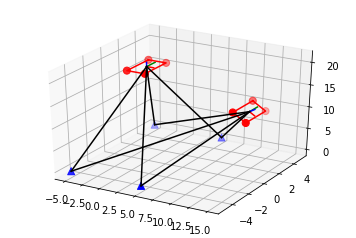

In [10]:
# cancel the noise 
img1.exteriorOrientationParameters = np.array([[0, 0, 20, 0, 0, 0]])

# define synthetic image
imgS1 = SingleImage(camera1,'synthetic')
azimuth = np.radians(0)
phi = np.radians(45)
kappa = np.radians(0)
Z = 20
imgS1.exteriorOrientationParameters = np.array([[0, 0, Z, azimuth, phi, kappa]])
imgS1.exteriorOrientationParameters[0:3] = np.dot(imgS1.RotationMatrix,imgS1.PerspectiveCenter)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
img1.drawSingleImage(squere,100,ax,'yes')
imgS1.drawSingleImage(squere,100,ax,'yes')
ax.scatter(squere[:,0],squere[:,1],squere[:,2], c='b', s=50,marker='^')

print(imgS1.exteriorOrientationParameters)

נייצר את הנתונים לאחר ההתמרה

In [11]:
imagePoints2 = imgS1.GroundToImage(squere)
print(imagePoints2)

[[ -5.25773875   7.43556557]
 [  7.51580334  10.6289512 ]
 [  7.51580334 -10.6289512 ]
 [ -5.25773875  -7.43556557]]


נבנה את המודל אותו נרצה לבדוק

אוריינטציה חיצונית באמצעות הכלל הקו-לינארי. הפונקציה נבנתה סמסטר קודם

נוודא שהדגימות והמודל נכונים

 - נפתור את התאום עם הדגימות שיצרנו ונוודא שזהו המודל הנכון



In [12]:
imgS1.innerOrientationParameters = np.array([0,1,0,0,0,1])
imgS1.exteriorOrientationParameters, sigma0, sigmaX =  imgS1.ComputeExteriorOrientation(imagePoints2,squere,0.001)
print(imgS1.exteriorOrientationParameters)
print(imgS1.exteriorOrientationParameters[3]-2*np.pi)
print(imgS1.exteriorOrientationParameters[5]+2*np.pi)

[array([14.14213539]) array([1.89236382e-15]) array([14.14213444])
 6.283185307179586 0.7853981912683755 array([-6.28318531])]
0.0
[0.]


נוסיף רעש מדידה עבור הנקודות המקוריות  

הדגימות נלקחות באופן שרירותי מתוך מהתפלגות נורמלית 
$$ x, y\sim (\mu, \sigma) $$

-  נוסיף רעש מדידה של 1 ס"מ: $\sigma=0.01$

In [13]:
noiseSize = 0.01
noise = np.random.normal(0, noiseSize, imagePoints2.shape)
imagePoints2 += noise
imgS1.exteriorOrientationParameters, sigma0, sigmaX =  imgS1.ComputeExteriorOrientation(imagePoints2,squere,0.001)
print(imgS1.exteriorOrientationParameters)

[array([14.13475162]) array([0.00382207]) array([14.16528849])
 6.2833746492018685 0.7841616283250541 array([-6.28314394])]


## שלב 2 -  השפעת פיזור נקודות בקרה על פתרון תצלום 

- כמה תצלומים נדרשים על מנת לבדוק את השפעת פיזור הנקודות על הפתרון?
- איך ניתן לייצר מספר תצלומים עם פיזורים שונים של נקודות הבקרה לצורך הבדיקה?
  - מהם הגורימים המשפיעים על שינוי בפיזור נקודות הבקרה בתצלום?
  - תארו את השלבים הנדרשים לבניה?


הגדירו מספר תצלומים (לפחות 8 תצלומים) מסביב לנקודות בקרה שהגדרתם בשלב ראשון

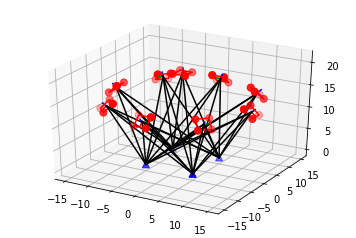

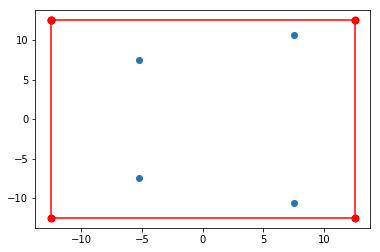

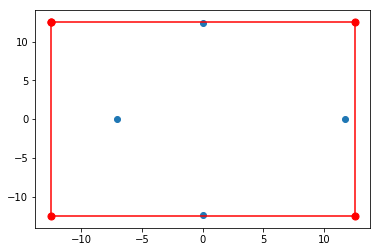

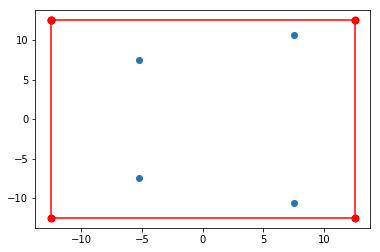

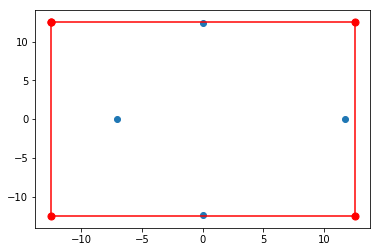

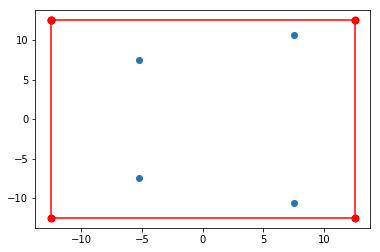

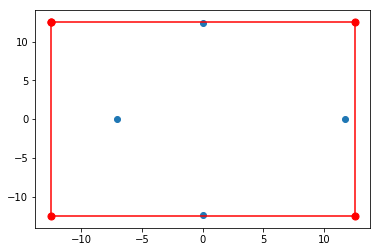

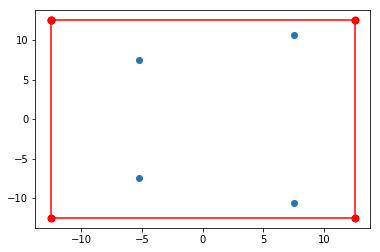

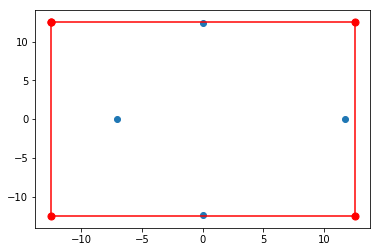

In [14]:
# define 8 synthetic image
azimuth = np.radians(np.array([0,45,90,135,180,225,270,315]))
phi = np.radians(45)
kappa = np.radians(np.array([0,0,0,0,0,0,0,0]))
Z = 20
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(squere[:,0],squere[:,1],squere[:,2], c='b', s=50,marker='^')
img1.drawSingleImage(squere,100,ax,'yes')
images = []
for i in range(len(azimuth)):
    # define image
    imgS = SingleImage(camera1,'synthetic')
    imgS.innerOrientationParameters = np.array([0, 1, 0, 0, 0, 1])
    imgS.exteriorOrientationParameters = np.array([[0, 0, Z, azimuth[i], phi, kappa[i]]])
    imgS.exteriorOrientationParameters[0:3] = np.dot(imgS.RotationMatrix,imgS.PerspectiveCenter)
    # draw image
    imgS.drawSingleImage(squere,100,ax,'yes')
    
    images.append(imgS)
    
    # draw in camera system
    imagePoints_S = imgS.GroundToImage(squere)
    plt.figure()
    pv.drawImageFrame2D(imgS.camera.sensorSize, imgS.camera.sensorSize)
    plt.scatter(imagePoints_S[:, 0], imagePoints_S[:, 1])


חשבו את האוריינטציה חיצונית עבור כל אחד מהתצלומים שיצרתם

In [ ]:
for imgS in images:
    imagePoints3 = imgS.GroundToImage(squere)
    print('samples:', '\n', imagePoints3)
    print('Exterior Orientation before:', '\n', imgS.exteriorOrientationParameters)
    imgS.exteriorOrientationParameters, sigma0, sigmaX = imgS.ComputeExteriorOrientation(imagePoints3, squere,0.001)
    print('Exterior Orientation:', '\n', imgS.exteriorOrientationParameters)
    print("sigma X-diag:",'\n',np.diag(sigmaX))



samples: 
 [[ -5.25773875   7.43556557]
 [  7.51580334  10.6289512 ]
 [  7.51580334 -10.6289512 ]
 [ -5.25773875  -7.43556557]]
Exterior Orientation before: 
 [[14.14213538]
 [ 0.        ]
 [14.14213538]
 [ 0.        ]
 [ 0.78539816]
 [ 0.        ]]
Exterior Orientation: 
 [array([14.14213539]) array([1.89236382e-15]) array([14.14213444])
 6.283185307179586 0.7853981912683755 array([-6.28318531])]
sigma X-diag: 
 [3.01590679e-14 1.19906624e-13 5.80657333e-14 5.57619320e-16
 1.73068767e-16 5.57318570e-16]
samples: 
 [[ 1.48716314e-06  1.23743694e+01]
 [ 1.16666689e+01  0.00000000e+00]
 [ 1.48716314e-06 -1.23743694e+01]
 [-6.99999891e+00  0.00000000e+00]]
Exterior Orientation before: 
 [[ 9.9999994 ]
 [ 9.9999994 ]
 [14.14213538]
 [ 0.78539816]
 [ 0.78539816]
 [ 0.        ]]
Exterior Orientation: 
 [array([9.99999979]) array([9.99999928]) array([14.14213492])
 0.7853981297849515 0.7853982195609135 array([3.79447314e-08])]
sigma X-diag: 
 [3.28148367e-14 3.28135600e-14 6.99175862e-14 1.97

ניתוח תוצאות

 - השוו את התוצאות שקיבלתם עם הערכים הידועים
 - הציגו את הדיוק של כל פתרון 

 - האם פיזור שונה של נקודות בקרה בתצלום הוביל לתוצאות שונות?
   - התייחסו לקונפיגורציות שונות

האם קיים הבדל בין תוצאות הפתרון בין תצלום אנכי לתצלום עם אוריינטציה כללית? נמקו